<a href="https://colab.research.google.com/github/Mahnazshamissa/Python/blob/main/Ex1_fatemehDikshaIago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab exercise 1


Per Group:
1.   Create a teams-meeting where one person opens the colab notebook and shares the screen
2.   Change the network as described below
3.   Train the network, then plot the training history and evaluate it one the test set
4.   Post the training history image and the test accuracy in the general Deep Learning teams channel
5.   Think about why your network performed better or worse compared to the ~63% accuracy of the network in the lecture



- **Group A:** Add one more convolutional layer (with stride 1) to the network and train the network
- **Group C:** Add three more convolutional layers (with stride 1) to the network and train the network
- **Group D:** Replace all convolutional layers, the GlobalAveragePooling layer and the first Dense layer with a tf.keras.layers.Flatten() and train the network
- **Group E:** Add an additional Dense layer after the first Dense layer and train the network



## Setup notebook environment

Make sure the Colab environment has a GPU enabled *Edit->Notebook Settings->Hardware accelerator->Choose GPU*

In [ ]:
! nvidia-smi

Tue Oct 27 11:16:11 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Download the dataset first

In [ ]:
! wget https://pub.ist.ac.at/~mlechner/datasets/f8d.tar.gz
! tar -xf f8d.tar.gz

--2020-10-27 11:16:20--  https://pub.ist.ac.at/~mlechner/datasets/f8d.tar.gz
Resolving pub.ist.ac.at (pub.ist.ac.at)... 81.223.84.195
Connecting to pub.ist.ac.at (pub.ist.ac.at)|81.223.84.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76149807 (73M) [application/x-gzip]
Saving to: ‘f8d.tar.gz’

f8d.tar.gz          100%[===================>]  72.62M  6.10MB/s    in 12s     

2020-10-27 11:16:33 (6.17 MB/s) - ‘f8d.tar.gz’ saved [76149807/76149807]



Import python libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Step 1: Define datasets

In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "f8d/test", shuffle=False, batch_size=128, image_size=(224, 224),
)
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "f8d/training",
  shuffle=True,
  batch_size=64,
  image_size=(224, 224),
  validation_split=0.2,
  subset="training",
  seed=1020202,
)
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "f8d/training",
  shuffle=True,
  batch_size=128,
  image_size=(224, 224),
  validation_split=0.2,
  subset="validation",
  seed=1020202,
)
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
valid_dataset = valid_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 640 files belonging to 8 classes.
Found 1840 files belonging to 8 classes.
Using 1472 files for training.
Found 1840 files belonging to 8 classes.
Using 368 files for validation.


## Step 2 and 3: Define model and objective

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(224,224,3)),
  tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255),
  tf.keras.layers.Conv2D(32, (5, 5), strides=2, activation="relu"),
  tf.keras.layers.Conv2D(64, (5, 5), strides=2, activation="relu"),
  tf.keras.layers.Conv2D(128, (5, 5), strides=2, activation="relu"),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(8, activation="softmax"),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 110, 110, 32)      2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 53, 53, 64)        51264     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 128)       204928    
_________________________________________________________________
global_average_pooling2d_4 ( (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)              

## Step 4: Train the model

In [ ]:
training_log = model.fit(
  train_dataset, epochs=150, validation_data=valid_dataset
)

Epoch 1/150
23/23 [==============================] - 3s 141ms/step - loss: 2.0728 - sparse_categorical_accuracy: 0.1338 - val_loss: 2.1077 - val_sparse_categorical_accuracy: 0.1386
Epoch 2/150
23/23 [==============================] - 3s 123ms/step - loss: 2.0519 - sparse_categorical_accuracy: 0.1610 - val_loss: 2.0134 - val_sparse_categorical_accuracy: 0.1712
Epoch 3/150
23/23 [==============================] - 3s 125ms/step - loss: 2.0146 - sparse_categorical_accuracy: 0.1760 - val_loss: 1.9948 - val_sparse_categorical_accuracy: 0.1793
Epoch 4/150
23/23 [==============================] - 3s 123ms/step - loss: 2.0069 - sparse_categorical_accuracy: 0.1929 - val_loss: 1.9738 - val_sparse_categorical_accuracy: 0.1984
Epoch 5/150
23/23 [==============================] - 3s 122ms/step - loss: 1.9652 - sparse_categorical_accuracy: 0.2052 - val_loss: 1.9309 - val_sparse_categorical_accuracy: 0.2745
Epoch 6/150
23/23 [==============================] - 3s 124ms/step - loss: 1.9260 - sparse_cate

Visualize the training

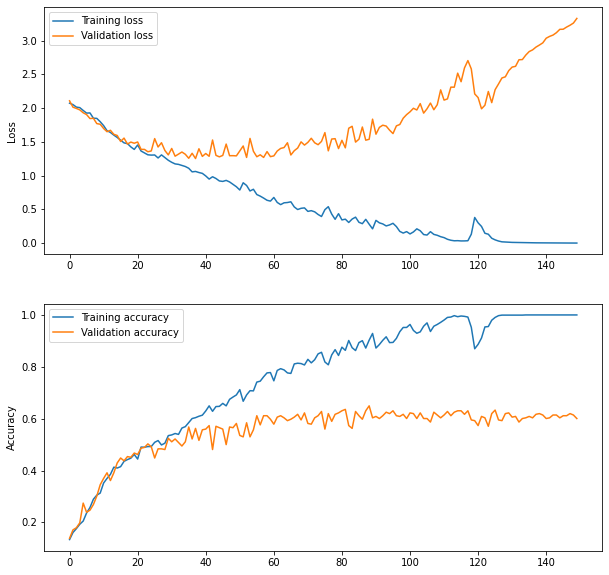

In [ ]:
fig,axes = plt.subplots(2,1,figsize=(10,10))
axes[0].plot(training_log.history["loss"],label="Training loss")
axes[0].plot(training_log.history["val_loss"],label="Validation loss")
axes[0].legend(loc="upper left")
axes[0].set_ylabel("Loss")
axes[1].plot(training_log.history["sparse_categorical_accuracy"],label="Training accuracy")
axes[1].plot(training_log.history["val_sparse_categorical_accuracy"],label="Validation accuracy")
axes[1].legend(loc="upper left")
axes[1].set_ylabel("Accuracy")
fig.show()

## Step 5: Evaluate the model

In [ ]:
model.evaluate(test_dataset)

5/5 [==============================] - 1s 183ms/step - loss: 3.1430 - sparse_categorical_accuracy: 0.6469


[3.1430106163024902, 0.6468750238418579]

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(224,224,3)),
  tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255),
  tf.keras.layers.Conv2D(32, (5, 5), strides=2, activation="relu"),
  tf.keras.layers.Conv2D(64, (5, 5), strides=2, activation="relu"),
  tf.keras.layers.Conv2D(128, (5, 5), strides=2, activation="relu"),
  tf.keras.layers.Conv2D(256, (5, 5), strides=1, activation="relu"),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(8, activation="softmax"),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 110, 110, 32)      2432      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 53, 53, 64)        51264     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 25, 25, 128)       204928    
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 21, 21, 256)       819456    
_________________________________________________________________
global_average_pooling2d_7 ( (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)              

In [ ]:
training_log = model.fit(
  train_dataset, epochs=150, validation_data=valid_dataset
)

Epoch 1/150
23/23 [==============================] - 3s 140ms/step - loss: 2.0807 - sparse_categorical_accuracy: 0.1250 - val_loss: 2.0730 - val_sparse_categorical_accuracy: 0.1467
Epoch 2/150
23/23 [==============================] - 3s 130ms/step - loss: 2.0712 - sparse_categorical_accuracy: 0.1515 - val_loss: 2.0656 - val_sparse_categorical_accuracy: 0.1630
Epoch 3/150
23/23 [==============================] - 3s 131ms/step - loss: 2.0693 - sparse_categorical_accuracy: 0.1522 - val_loss: 2.0505 - val_sparse_categorical_accuracy: 0.1875
Epoch 4/150
23/23 [==============================] - 3s 129ms/step - loss: 2.0483 - sparse_categorical_accuracy: 0.1732 - val_loss: 2.0307 - val_sparse_categorical_accuracy: 0.2038
Epoch 5/150
23/23 [==============================] - 3s 132ms/step - loss: 2.0518 - sparse_categorical_accuracy: 0.1868 - val_loss: 2.0252 - val_sparse_categorical_accuracy: 0.2065
Epoch 6/150
23/23 [==============================] - 3s 127ms/step - loss: 2.0310 - sparse_cate